# Sample ERP Study

This notebook iterates over each BIDS subject inside of THIS project's derivative, then plots some traditional ERPs

This notebook assumes that, in general, you follow and understand the concepts in:

* `explore_source.ipynb`
* `init_bids_study.ipynb`
* `quick_clean.ipynb`

The following cell imports what is necessary for this notebook to run, and also prompts which experimental events (defined as `conditions`) are of interest.

Note that this is **not** what is being compared, but instead everything that you may ever want to use in a comparison.

In [1]:
import mne, glob

conditions = ['face', 'house', 'press'] # What you would expect a researcher to provide on a per study/experiment basis

To collect all of the epoched data to generate ERPs, all data is appended to a structure called the `averaging_dict`.

The code to generate this uses what is called a "dictionary comprehension".

The goal of the structure is for every condition of interest to be a key, and the value to be a list of waveforms. Each single waveform in the list is contributed by a subject at the given key/condition.

In [3]:
averaging_dict = {k:[] for k in conditions}
averaging_dict

{'face': [], 'house': [], 'press': []}

The `averaging_dict` of courese starts empty.

Then, the following loop iterates over each subject in this project's derivative.

The `Epochs` object is briefly covered in the `explore_source.ipynb` notebook, and further documentation can be found [here](https://mne.tools/stable/generated/mne.Epochs.html).

The following codeblock and loop are annotated to help researchers modify to suit their own needs.

In [4]:
# Iterate over each subject in this project's derivative
for file in glob.glob('../derivatives/quick_clean/sub-*/eeg/*.fif'):
    raw = mne.io.read_raw(file) # Read the given file
    events, event_dict = mne.events_from_annotations(raw) # Extract evemts
    
    # Call to epoch the data to discontinuous form
    epochs = mne.Epochs(
        raw, # What is being operated on
        events, # Reference to the events
        event_id=event_dict, # Labelling for events
        tmin=-0.2, # How many seconds BEFORE an event to consider; implies the baseline
        tmax=0.6, # How many seconds AFTER an event to consider
        reject={'eeg': 150e-6}, # 150 µV peak-to-peak voltage rejection as outlined in `explore_source.ipynb`
        preload=True, # Make sure data is in memory
    )

    # For each condition, access the averaging_dict at the given condition and place the subject's averaged data there
    for condition in conditions:
        averaging_dict[condition].append(epochs[condition].average())

Opening raw data file ../derivatives/quick_clean/sub-1/eeg/sub-1_eeg.fif...
    Range : 0 ... 280575 =      0.000 ...   273.999 secs
Ready.
Used Annotations descriptions: ['boundary', 'press/left', 'press/right', 'static/checker/left', 'static/checker/right', 'static/face/inverted', 'static/face/upright', 'static/house/inverted', 'static/house/upright']
Not setting metadata
401 matching events found
Setting baseline interval to [-0.2001953125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 401 events and 820 original time points ...
0 bad epochs dropped
Opening raw data file ../derivatives/quick_clean/sub-4/eeg/sub-4_eeg.fif...
    Range : 0 ... 266239 =      0.000 ...   259.999 secs
Ready.
Used Annotations descriptions: ['press/left', 'press/right', 'static/checker/left', 'static/checker/right', 'static/face/inverted', 'static/face/upright', 'static/house/inverted', 'static/house/upright']
Not setting metadata
384 matching events found
S

We can now check to see if the `averaging_dict` is populated with all four tutorial subjects using another dictionary comprehension:

In [5]:
{k:len(v) for k,v in averaging_dict.items()}

{'face': 4, 'house': 4, 'press': 4}

At this point, MNE offers several different helper functions for comparing between conditions.

As this is a simple tutorial, we will use `mne.viz.plot_compare_evokeds` to compare all conditions inside of `averaging_dict`.

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


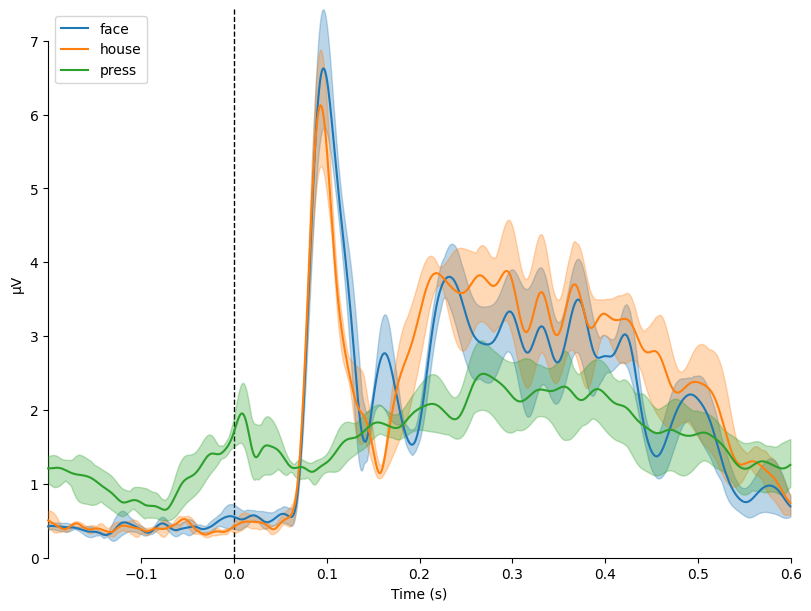

[<Figure size 800x600 with 1 Axes>]

In [8]:
mne.viz.plot_compare_evokeds(averaging_dict)

This figure may not appear instructive at first glance, but the default parameters of `mne.viz.plot_compare_evokeds` compute the Global Field Power (GFP) for all entries in the dictionary it receives.

To view a more standard ERP analysis the parameters can be changed as follows to view a single channel:

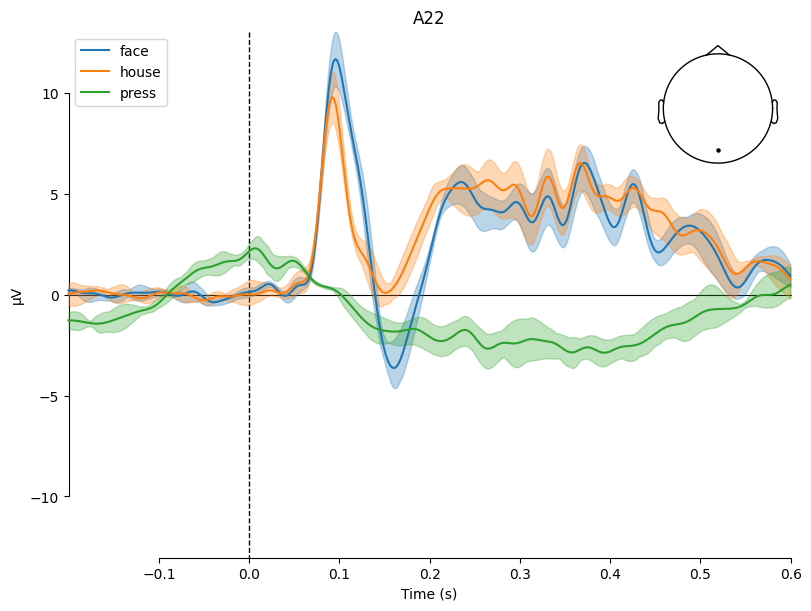

[<Figure size 800x600 with 2 Axes>]

In [9]:
mne.viz.plot_compare_evokeds(averaging_dict, picks=['A22'])

Or perhaps take the average of multiple channels:

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


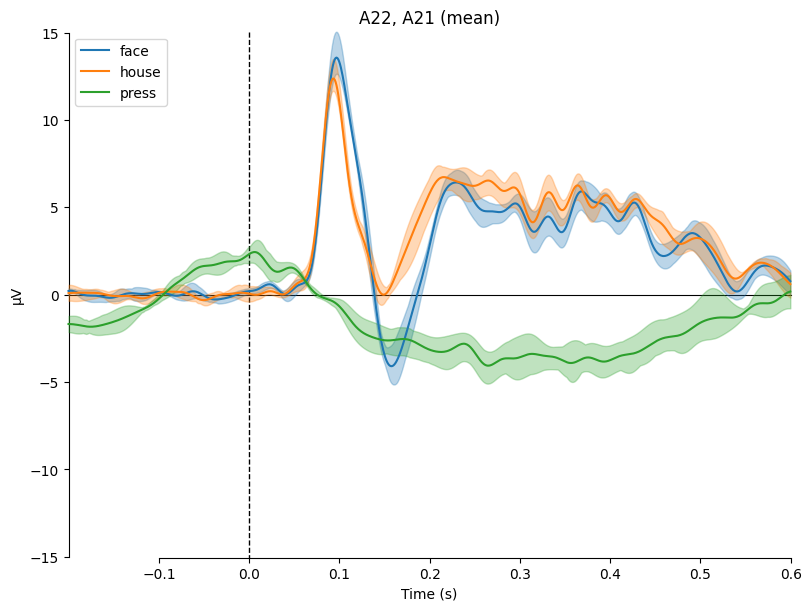

[<Figure size 800x600 with 1 Axes>]

In [12]:
mne.viz.plot_compare_evokeds(averaging_dict, picks=['A22', 'A21'], combine='mean')